In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from tigro.classes.parser import Parser

from tigro.io.load import load_phmap
from tigro.core.process import filter_phmap
from tigro.utils.util import get_threshold
from tigro.core.process import med_phmap
from tigro.core.fit import fit_ellipse
from tigro.core.process import register_phmap
from tigro.utils.util import get_uref
from tigro.plots.plot import plot_sag
from tigro.core.fit import fit_zernike
from tigro.io.save import to_pickle
from tigro.plots.plot import plot_allpolys
from tigro.plots.plot import plot_polys
from tigro.io.load import from_pickle
from tigro.utils.util import get_diff_idx
from tigro.core.process import zerog_phmap
from tigro.plots.plot import plot_zerog
from tigro.core.process import delta_phmap
from tigro.plots.plot import plot_map

from tigro import logger

In [3]:
config = "/export/NAS/ariel/data/andrea.bocchieri/TIGRO/input/config.ini"
outpath = "/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output_prova"
pp = Parser(config, outpath)
logger.setLevel(pp.loglevel)

2024-08-04 16:55:15,912 - tigro - INFO - Initializing parser
2024-08-04 16:55:15,914 - tigro - DEBUG - Config file read
2024-08-04 16:55:15,915 - tigro - DEBUG - System parameters read
2024-08-04 16:55:15,916 - tigro - DEBUG - CGVT parameters read
2024-08-04 16:55:15,918 - tigro - DEBUG - CGVT plots options read
2024-08-04 16:55:15,919 - tigro - DEBUG - Zerog plots options read


In [4]:
pp.__dict__

{'config': '/export/NAS/ariel/data/andrea.bocchieri/TIGRO/input/config.ini',
 'cparser': <configparser.ConfigParser at 0x7ff56c18f760>,
 'project': 'Template',
 'comment': 'Template for the configuration file',
 'version': '1.0',
 'datapath': '/export/NAS/ariel/data/ariel_user/TA/M1-SM/formatted_data',
 'outpath': '/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output_prova',
 '_sequence_ids': '273-284, 285-296',
 'sequence_ids': array([273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285,
        286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296]),
 'store_phmap': False,
 'fname_phmap': '/home/ariel/andrea.bocchieri/DATA/Optics/TA/arcetri/tigro_output_prova/tigro.pkl',
 'loglevel': 'DEBUG',
 'run_cgvt': True,
 'phmap_threshold': 0.1,
 '_phmap_filter_type': 'mean',
 'phmap_filter_type': <numpy.ma.core._frommethod at 0x7ff5545ed780>,
 'phmap_semi_major': 451,
 'phmap_semi_minor': 310,
 'phmap_seq_ref': 273,
 'n_zernike': 15,
 'plot_regmap': True,
 'plot_regmap_

### CGVT

In [5]:
logger.info("Running CGVT")

2024-08-04 16:55:15,978 - tigro - INFO - Running CGVT


In [6]:
logger.info("Loading phase maps")
phmap = load_phmap(pp.datapath, pp.sequence_ids)

2024-08-04 16:55:16,027 - tigro - INFO - Loading phase maps
2024-08-04 16:55:16,052 - tigro - DEBUG - Loading files ...
2024-08-04 16:55:16,117 - tigro - DEBUG - 273 010 20240715 273_10_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,139 - tigro - DEBUG - 273 011 20240715 273_11_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,153 - tigro - DEBUG - 273 012 20240715 273_12_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,165 - tigro - DEBUG - 273 013 20240715 273_13_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,176 - tigro - DEBUG - 273 014 20240715 273_14_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,186 - tigro - DEBUG - 273 015 20240715 273_15_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,197 - tigro - DEBUG - 273 016 20240715 273_16_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-

2024-08-04 16:55:16,304 - tigro - DEBUG - 273 025 20240715 273_25_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,313 - tigro - DEBUG - 273 026 20240715 273_26_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,324 - tigro - DEBUG - 273 027 20240715 273_27_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,335 - tigro - DEBUG - 273 028 20240715 273_28_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,344 - tigro - DEBUG - 273 029 20240715 273_29_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,356 - tigro - DEBUG - 273 002 20240715 273_2_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,365 - tigro - DEBUG - 273 030 20240715 273_30_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
2024-08-04 16:55:16,376 - tigro - DEBUG - 273 003 20240715 273_3_20240715_M1_SM_four_kg_1g ['M1', 'SM', 'four', 'kg', '1g']
20

In [7]:
phmap[273].keys()

dict_keys(['rawmap', 'number', 'name', 'phi_offs'])

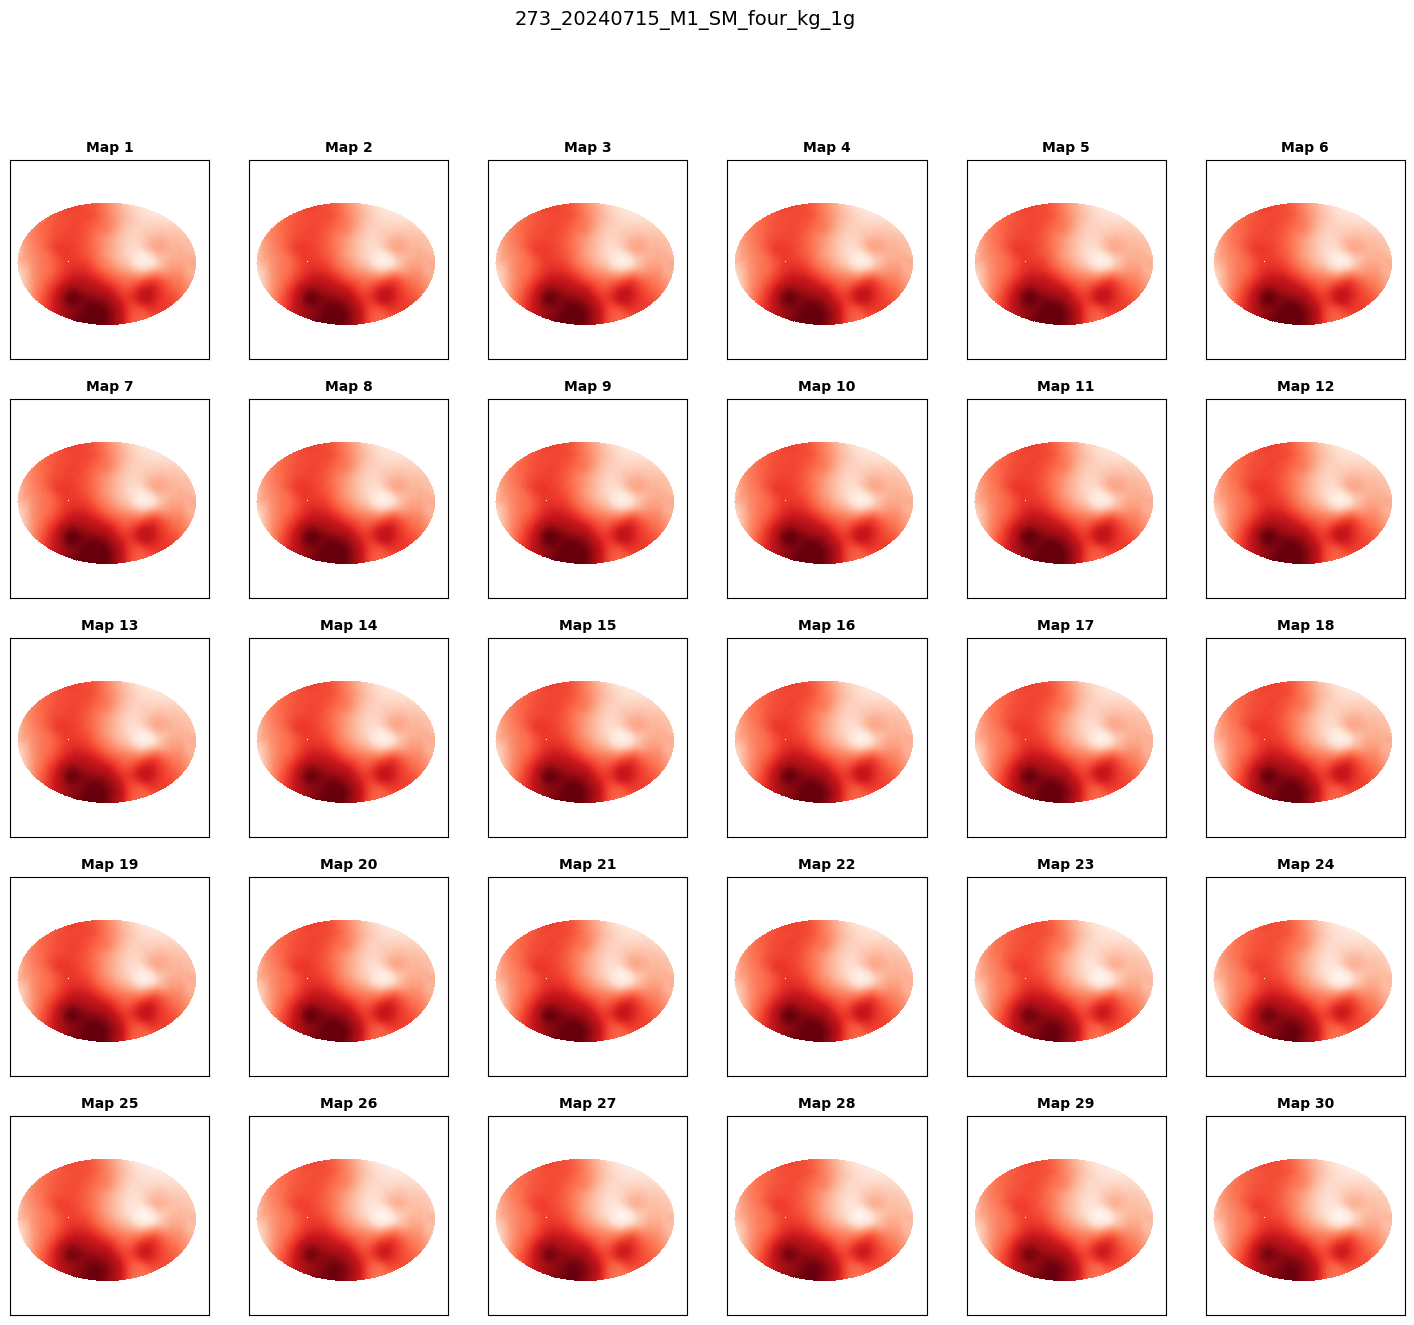

In [9]:
from tigro.plots.plot import plot_sag_quicklook

_ = plot_sag_quicklook(phmap, 273)

In [11]:
logger.info("Filtering phase maps")
phmap = filter_phmap(phmap)

2024-08-04 16:47:42,477 - tigro - INFO - Filtering phase maps
2024-08-04 16:47:42,478 - tigro - DEBUG - Filter sequence...
2024-08-04 16:47:42,480 - tigro - DEBUG - 273


2024-08-04 16:47:47,528 - tigro - DEBUG - Sequence 273 rotated
2024-08-04 16:47:47,533 - tigro - DEBUG - 274
2024-08-04 16:47:52,602 - tigro - DEBUG - Sequence 274 rotated
2024-08-04 16:47:52,604 - tigro - DEBUG - 275
2024-08-04 16:47:57,708 - tigro - DEBUG - Sequence 275 rotated
2024-08-04 16:47:57,710 - tigro - DEBUG - 276
2024-08-04 16:48:02,560 - tigro - DEBUG - Sequence 276 rotated
2024-08-04 16:48:02,561 - tigro - DEBUG - 277
2024-08-04 16:48:07,173 - tigro - DEBUG - Sequence 277 rotated
2024-08-04 16:48:07,174 - tigro - DEBUG - 278
2024-08-04 16:48:11,953 - tigro - DEBUG - Sequence 278 rotated
2024-08-04 16:48:11,955 - tigro - DEBUG - 279
2024-08-04 16:48:16,737 - tigro - DEBUG - 280
2024-08-04 16:48:21,439 - tigro - DEBUG - 281
2024-08-04 16:48:26,203 - tigro - DEBUG - 282
2024-08-04 16:48:30,985 - tigro - DEBUG - 283
2024-08-04 16:48:36,063 - tigro - DEBUG - 284
2024-08-04 16:48:41,034 - tigro - DEBUG - 285
2024-08-04 16:48:45,961 - tigro - DEBUG - 286
2024-08-04 16:48:50,796 

2024-08-04 16:49:39,314 - tigro - INFO - Getting threshold for outlier rejection


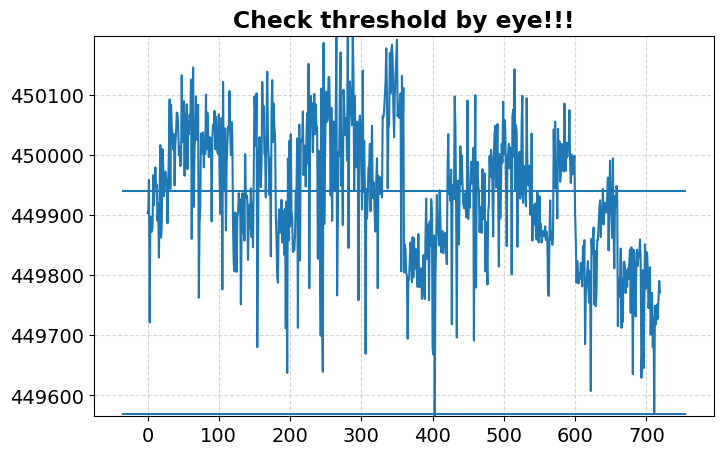

In [12]:
logger.info("Getting threshold for outlier rejection")
threshold = get_threshold(phmap, pp.phmap_threshold)

In [13]:
logger.info("Computing median map and supermask")
phmap = med_phmap(
    phmap,
    threshold,
    filter_type=pp.phmap_filter_type,
)

2024-08-04 16:49:40,131 - tigro - INFO - Computing median map and supermask


In [14]:
logger.info("Fitting ellipse to phase maps")
phmap = fit_ellipse(phmap)

2024-08-04 16:49:48,495 - tigro - INFO - Fitting ellipse to phase maps
2024-08-04 16:49:48,512 - tigro - DEBUG - 273 (527.7 533.6) 456.6 313.7 -0.3
2024-08-04 16:49:48,527 - tigro - DEBUG - 274 (528.0 533.5) 456.8 313.5 -0.3
2024-08-04 16:49:48,541 - tigro - DEBUG - 275 (527.7 533.5) 456.8 313.5 -0.3
2024-08-04 16:49:48,555 - tigro - DEBUG - 276 (527.7 533.5) 456.7 313.6 -0.3
2024-08-04 16:49:48,569 - tigro - DEBUG - 277 (527.9 533.4) 456.8 313.5 -0.3
2024-08-04 16:49:48,583 - tigro - DEBUG - 278 (527.8 533.7) 456.7 313.7 -0.3
2024-08-04 16:49:48,597 - tigro - DEBUG - 279 (497.4 488.7) 456.8 313.4 0.4


2024-08-04 16:49:48,611 - tigro - DEBUG - 280 (497.1 488.5) 457.0 313.3 0.4
2024-08-04 16:49:48,625 - tigro - DEBUG - 281 (497.2 488.7) 456.9 313.4 0.3
2024-08-04 16:49:48,639 - tigro - DEBUG - 282 (497.1 488.6) 456.9 313.4 0.4
2024-08-04 16:49:48,653 - tigro - DEBUG - 283 (497.2 488.7) 456.9 313.4 0.3
2024-08-04 16:49:48,667 - tigro - DEBUG - 284 (497.1 488.6) 456.9 313.5 0.4
2024-08-04 16:49:48,681 - tigro - DEBUG - 285 (497.2 488.6) 456.9 313.3 0.3
2024-08-04 16:49:48,695 - tigro - DEBUG - 286 (497.4 488.7) 456.8 313.4 0.4
2024-08-04 16:49:48,709 - tigro - DEBUG - 287 (497.3 488.7) 456.8 313.5 0.3
2024-08-04 16:49:48,723 - tigro - DEBUG - 288 (497.2 488.6) 456.9 313.3 0.3
2024-08-04 16:49:48,737 - tigro - DEBUG - 289 (497.2 488.7) 456.9 313.4 0.3
2024-08-04 16:49:48,751 - tigro - DEBUG - ** Sequence: 290 is outlier
2024-08-04 16:49:48,752 - tigro - DEBUG - 290 (497.2 488.7) 456.8 313.5 0.3
2024-08-04 16:49:48,766 - tigro - DEBUG - 291 (505.6 531.0) 456.6 313.6 -0.2
2024-08-04 16:49:

In [15]:
logger.info("Registering phase maps")
phmap = register_phmap(phmap)

2024-08-04 16:49:48,861 - tigro - INFO - Registering phase maps


2024-08-04 16:49:49,137 - tigro - DEBUG - || seq:273 | dx:-15.74 dy:-21.65  ||
2024-08-04 16:49:49,387 - tigro - DEBUG - || seq:274 | dx:-15.99 dy:-21.52  ||
2024-08-04 16:49:49,644 - tigro - DEBUG - || seq:275 | dx:-15.72 dy:-21.54  ||
2024-08-04 16:49:49,899 - tigro - DEBUG - || seq:276 | dx:-15.66 dy:-21.53  ||
2024-08-04 16:49:50,157 - tigro - DEBUG - || seq:277 | dx:-15.86 dy:-21.38  ||
2024-08-04 16:49:50,412 - tigro - DEBUG - || seq:278 | dx:-15.80 dy:-21.66  ||
2024-08-04 16:49:50,655 - tigro - DEBUG - || seq:279 | dx: 14.58 dy: 23.31  ||
2024-08-04 16:49:50,898 - tigro - DEBUG - || seq:280 | dx: 14.90 dy: 23.45  ||
2024-08-04 16:49:51,142 - tigro - DEBUG - || seq:281 | dx: 14.81 dy: 23.35  ||
2024-08-04 16:49:51,384 - tigro - DEBUG - || seq:282 | dx: 14.93 dy: 23.44  ||
2024-08-04 16:49:51,631 - tigro - DEBUG - || seq:283 | dx: 14.80 dy: 23.30  ||
2024-08-04 16:49:51,874 - tigro - DEBUG - || seq:284 | dx: 14.94 dy: 23.45  ||
2024-08-04 16:49:52,120 - tigro - DEBUG - || seq:285

In [16]:
logger.info("Getting reference map")
uref = get_uref(
    phmap,
    pp.phmap_semi_major,
    pp.phmap_semi_minor,
    pp.phmap_seq_ref,
)

2024-08-04 16:49:54,899 - tigro - INFO - Getting reference map


2024-08-04 16:49:54,935 - tigro - INFO - Plotting sag of registered phase map


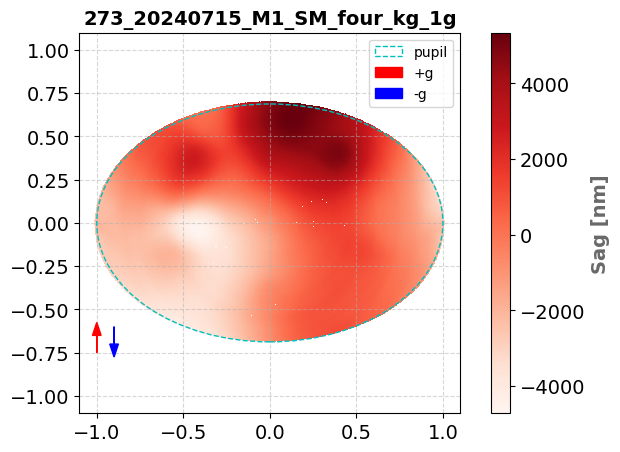

In [17]:
if pp.plot_regmap:
    logger.info("Plotting sag of registered phase map")
    plot_sag(
        phmap,
        uref,
        imkey=pp.plot_regmap_imkey,
        imsubkey="RegMap",
    )

In [18]:
logger.info("Fitting Zernike orthonormal polynomials")
phmap = fit_zernike(
    phmap,
    uref,
    NZernike=pp.n_zernike,
)

2024-08-04 16:49:55,264 - tigro - INFO - Fitting Zernike orthonormal polynomials
2024-08-04 16:49:55,266 - tigro - DEBUG - Calculating 15 Polys... 
2024-08-04 16:49:57,187 - tigro - DEBUG - ... done!
2024-08-04 16:49:57,188 - tigro - DEBUG - Fitting sequence n: ...
2024-08-04 16:49:57,189 - tigro - DEBUG - 273
2024-08-04 16:49:57,448 - tigro - DEBUG - 274
2024-08-04 16:49:57,746 - tigro - DEBUG - 275
2024-08-04 16:49:58,043 - tigro - DEBUG - 276
2024-08-04 16:49:58,341 - tigro - DEBUG - 277
2024-08-04 16:49:58,647 - tigro - DEBUG - 278
2024-08-04 16:49:58,957 - tigro - DEBUG - 279
2024-08-04 16:49:59,266 - tigro - DEBUG - 280
2024-08-04 16:49:59,574 - tigro - DEBUG - 281
2024-08-04 16:49:59,880 - tigro - DEBUG - 282
2024-08-04 16:50:00,183 - tigro - DEBUG - 283


2024-08-04 16:50:00,478 - tigro - DEBUG - 284
2024-08-04 16:50:00,772 - tigro - DEBUG - 285
2024-08-04 16:50:01,063 - tigro - DEBUG - 286
2024-08-04 16:50:01,350 - tigro - DEBUG - 287
2024-08-04 16:50:01,638 - tigro - DEBUG - 288
2024-08-04 16:50:01,926 - tigro - DEBUG - 289
2024-08-04 16:50:02,214 - tigro - DEBUG - 290
2024-08-04 16:50:02,501 - tigro - DEBUG - 291
2024-08-04 16:50:02,788 - tigro - DEBUG - 292
2024-08-04 16:50:03,075 - tigro - DEBUG - 293
2024-08-04 16:50:03,363 - tigro - DEBUG - 294
2024-08-04 16:50:03,650 - tigro - DEBUG - 295
2024-08-04 16:50:03,938 - tigro - DEBUG - 296


2024-08-04 16:50:04,255 - tigro - INFO - Plotting sag of registered phase map, minus the Piston, Tip, Tilts and Defocus


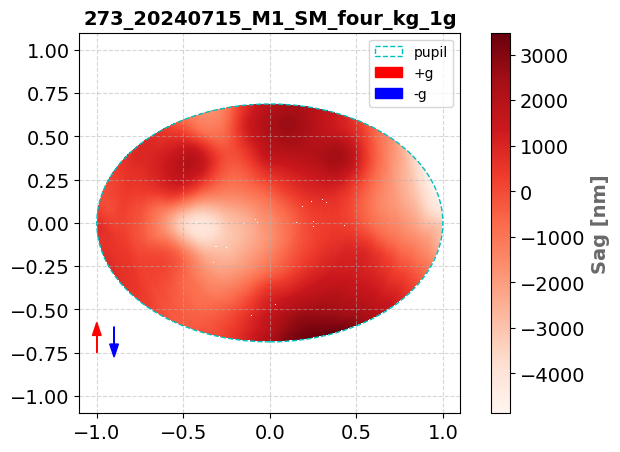

In [19]:
if pp.plot_regmap_no_pttf:
    logger.info(
        "Plotting sag of registered phase map, minus the Piston, Tip, Tilts and Defocus"
    )
    plot_sag(
        phmap,
        uref,
        imkey=pp.plot_regmap_no_pttf_imkey,
        imsubkey="RegMap-PTTF",
    )

In [20]:
if pp.store_phmap:
    logger.info("Saving results to pickle file")
    to_pickle(phmap, pp.outpath)

2024-08-04 16:50:04,624 - tigro - INFO - Plotting all polynomials


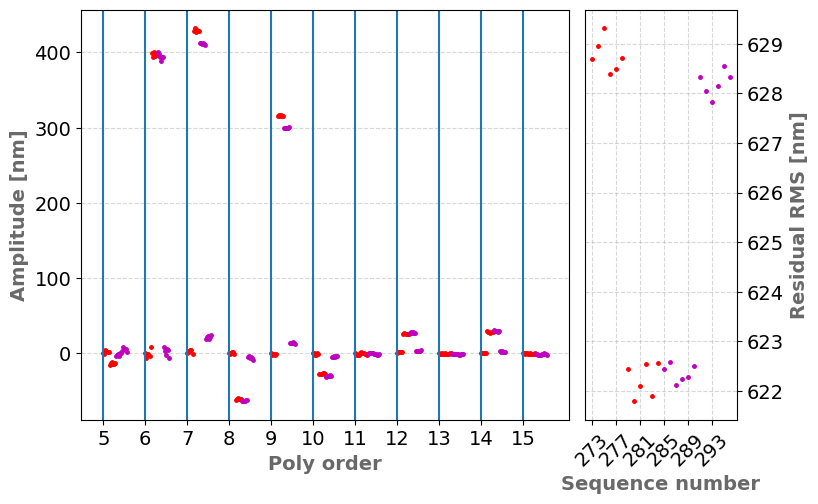

In [21]:
if pp.plot_allpolys:
    logger.info("Plotting all polynomials")
    plot_allpolys(
        phmap,
        sequence_ids=pp.sequence_ids,
        sequence_ref=pp.plot_allpolys_seq_ref,
        NZernike=pp.n_zernike,
        colors=pp.plot_allpolys_colors,
    )

2024-08-04 16:50:05,211 - tigro - INFO - Plotting subset of polynomials vs. sequence


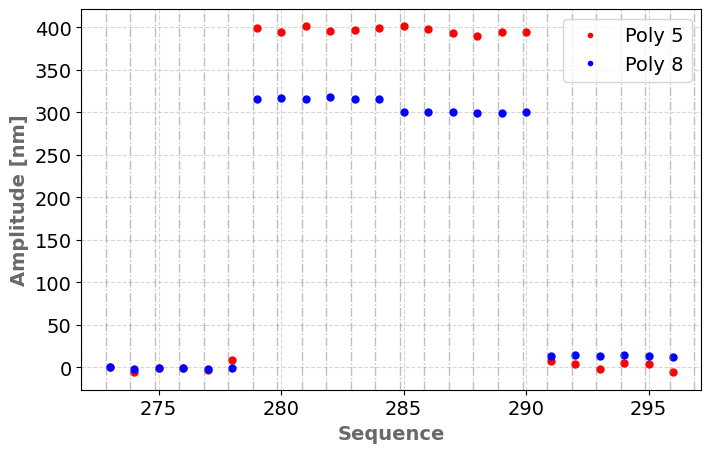

In [22]:
if pp.plot_polys:
    logger.info("Plotting subset of polynomials vs. sequence")
    plot_polys(
        phmap,
        sequence_ids=pp.sequence_ids,
        sequence_ref=pp.plot_polys_seq_ref,
        poly_order=pp.plot_polys_order,
        colors=pp.plot_polys_colors,
    )

### ZEROG

In [23]:
logger.info("Running ZeroG")

2024-08-04 16:50:05,442 - tigro - INFO - Running ZeroG


In [24]:
if not phmap:
    try:
        logger.info("Loading phase maps")
        phmap = from_pickle(pp.outpath)
    except FileNotFoundError:
        logger.error("File not found")

In [25]:
logger.info("Getting diff indices")
diff_idx = get_diff_idx(
    pp.idx_gplus, pp.idx_gminus, pp.zerog_colors
)

2024-08-04 16:50:42,613 - tigro - INFO - Getting diff indices


In [26]:
logger.info("ZeroG-ing phase maps")
medmap, zerogmap, coeff_med, cmed, rms, color = zerog_phmap(phmap, diff_idx)

2024-08-04 16:50:47,555 - tigro - INFO - ZeroG-ing phase maps


2024-08-04 16:50:58,793 - tigro - INFO - Plotting ZeroG results


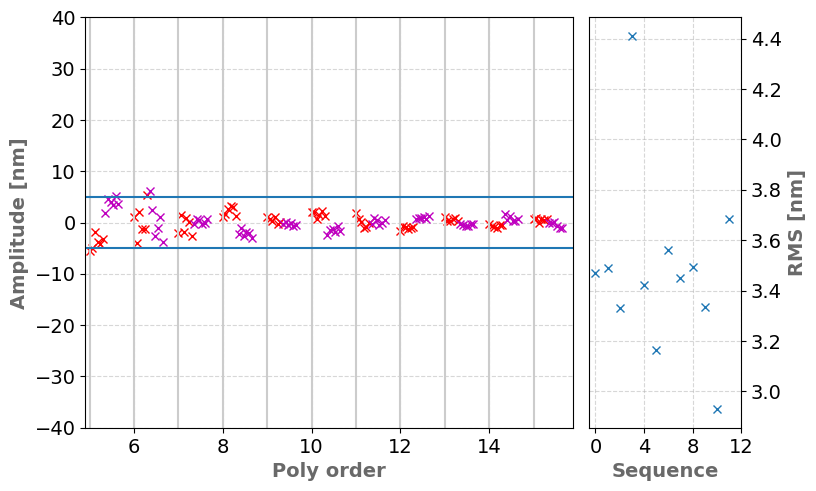

In [27]:
if pp.plot_zerog:
    logger.info("Plotting ZeroG results")
    plot_zerog(
        coeff_med,
        cmed,
        rms,
        pp.n_zernike,
        color,
        pp.plot_zerog_ylim,
    )

In [28]:
logger.info("Computing delta phase map")
dphmap = delta_phmap(
    zerogmap,
    idx0=pp.dphmap0_idx,
    idx1=pp.dphmap1_idx,
    gain=pp.dphmap_gain,
    filter_type=pp.dphmap_filter_type,
)

2024-08-04 16:51:23,221 - tigro - INFO - Computing delta phase map


2024-08-04 16:51:45,069 - tigro - INFO - Plotting delta phase map


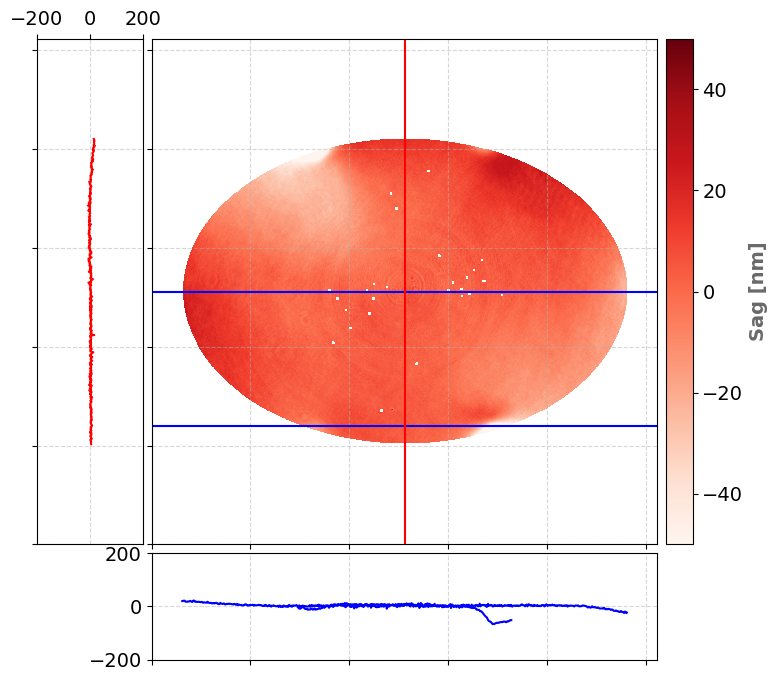

In [29]:
if pp.plot_dphmap:
    logger.info("Plotting delta phase map")

    plot_map(
        dphmap,
        Mlim=pp.plot_dphmap_vmin_vmax,
        hlines=pp.plot_dphmap_hlines,
        vlines=pp.plot_dphmap_vlines,
        hist_xlim=pp.plot_dphmap_hist_xlim,
        hist_ylim=pp.plot_dphmap_hist_ylim,
    )